# Tick Strategy
_Version 0.1_

In [46]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import tick_new as tk
import datetime

matplotlib.rcParams[ 'figure.figsize' ] = ( 18, 12 )

### Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [2]:
# the tickfile is a combined file of trades and quotes
tickfile = 'TSLA-TAQ-aug19v2.zip'
taq = pd.read_pickle(tickfile)

In [3]:
# filter on date, we need two dates, last trading day and today
test_day=datetime.datetime.strptime('08/02/19', '%m/%d/%y')
timedelta1=datetime.timedelta(days=1)
timedelta3=datetime.timedelta(days=3)

if test_day.weekday()==0:    
    last_day=test_day-timedelta3
else:
    last_day=test_day-timedelta1
    
test_day=datetime.datetime.strftime(test_day, '%m/%d/%y')
last_day=datetime.datetime.strftime(last_day, '%m/%d/%y')

day = taq[test_day]
last= taq[last_day]


## Run the Simulator

In [67]:
# our data
day.head()

,exch,bid_px,bid_size,ask_px,ask_size,qu_cond,qu_seqnum,natbbo_ind,qu_cancel,qu_source,symbol,suffix_x,suffix_y,trade_size,trade_px
2019-08-02 09:30:00.009655386,K,231.25,1.0,232.77,3.0,R,2339887.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-08-02 09:30:00.019727816,Q,231.00,1.0,232.00,1.0,R,2340124.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-08-02 09:30:00.039247507,Q,231.01,1.0,232.00,1.0,R,2340538.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-08-02 09:30:00.146463156,Z,231.49,1.0,232.91,1.0,R,2342963.0,2.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-08-02 09:30:00.146566023,B,230.47,5.0,232.87,3.0,R,2342965.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN


In [ ]:
# simulate the trading
results = tk.algo_loop( day, last )

2019-11-02 23:51:29:679208: Beginning Tick Strategy run
Average stock spread for sample: 0.1304
2019-11-02 23:51:30:193720: starting main loop


In [70]:
results['fair_values'].dropna().head()

2019-08-02 09:30:00.281648858    0.065201
2019-08-02 09:30:00.282118475    0.052782
2019-08-02 09:30:00.290165337    0.053965
2019-08-02 09:30:00.796961420    0.042615
2019-08-02 09:30:00.943620182    0.032347
dtype: float64

In [72]:
results['trades'].head()

,price,shares,bar,trade_type,side
2019-08-02 09:30:01.790691796,231.29,1,0,p,s
2019-08-02 09:30:03.213322084,231.43,4,0,p,b
2019-08-02 09:30:10.867151280,231.07,5,0,p,s
2019-08-02 09:30:11.411473578,231,1,0,p,s
2019-08-02 09:30:11.411475593,231,37,0,a,s


In [44]:
results['trades'].head()
sts=results['trades']
temp=tk.trade_statistics(sts)

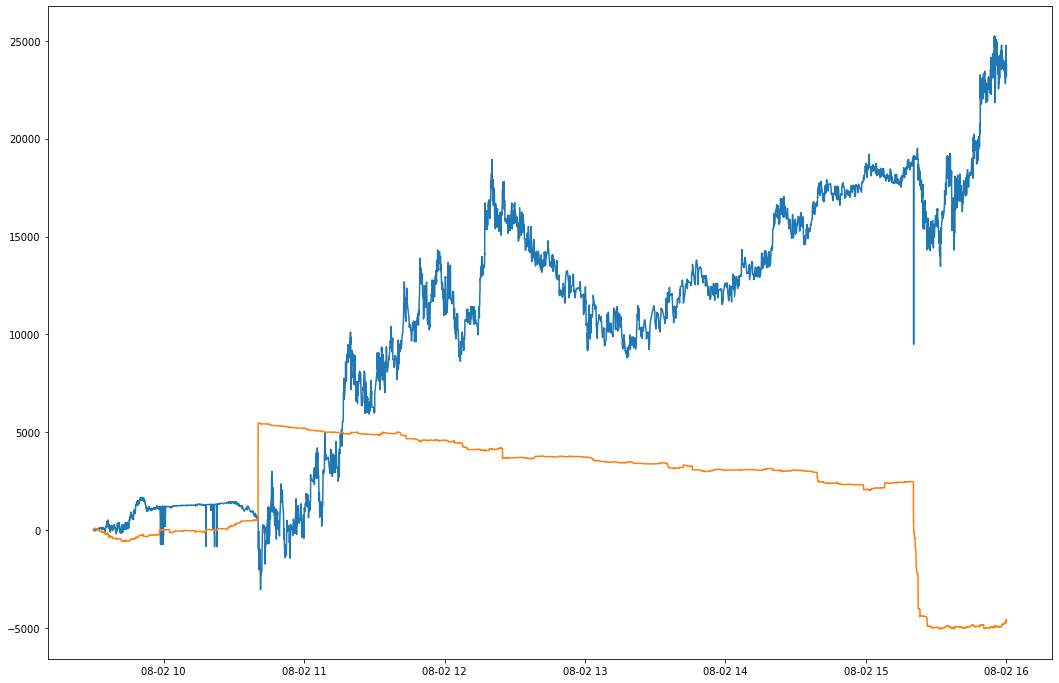

In [45]:
plt.plot(temp['hist']['P_L'], color='C0')
plt.plot(temp['hist']['current position'],color='C1')
plt.show()

In [75]:
results.keys()

dict_keys(['midpoints', 'fair_values', 'tick_factors', 'trades', 'quote_count', 'day_vwap', 'avg_price'])

In [76]:
results['day_vwap']

232.61886704507017

In [77]:
results['avg_price']

232.66583315986728

In [78]:
#slippage vs. vwap
results['day_vwap'] - results['avg_price']

-0.046966114797101

In [79]:
results['trades'].groupby(['trade_type']).count()

,price,shares,bar,side
trade_type,,,,
a,1137,1137,1137,1137
p,2984,2984,2984,2984
